---

# === [ **DATA EXPLORATION & VISUALISATION** ] ====

---


## **Introduction**



In this document, you will find:  
   * a presentation of dataframes that will be used by this project
   * a data exploration & visualisation of the data collected in those dataframes
   * a few comments that will explain how we will use data in the context of this project


### Objectives

As a reminder:
The main objective of this project is to classify mushrooms given pictures and possible other indications. More precisely, we will design a model that will classify mushrooms from pictures. The classification will consist in identifying a given level of taxonomy corresponding to a mushroom on an image. 
As this will be explained further in this document we plan to train our model so that it will be able to recognize the "genus" associated with a mushroom from an image

## **Initialization**


### Settings

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Settings
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

GDRIVE_MOUNT_POINT = '/content/drive'
PROJECT_DIR = GDRIVE_MOUNT_POINT + '/MyDrive/Mushroom_project' 
PY_LIB_DIR = PROJECT_DIR + '/src/lib'
SRC_DIR = PROJECT_DIR + '/datasource/mushroomObserver/dataframe/clean'
IMG_DIR=PROJECT_DIR + "/datasource/mushroomObserver/images"

MUSHROOMS_CSV_FILENAME = 'mushrooms.csv'
GENUS_CSV_FILENAME = 'genus.csv'

### Import Standard libraries

In [2]:
# Importing standard libraries
#
from google.colab import drive
import os
import cv2
import sys
import numpy as np
import pandas as pd
from skimage import io

import random

import matplotlib.pyplot as plt
%matplotlib inline

# Pandas settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

### Pre-requisites

In [3]:
# Pre-requisites
#
# Mounting Google drive if not already done
if not os.path.isdir(GDRIVE_MOUNT_POINT):
  drive.mount(GDRIVE_MOUNT_POINT)

Mounted at /content/drive


In [4]:
# Importing custom libraires
#
sys.path.insert(0, PY_LIB_DIR)
import mushroom_project as prj

## **Taxonomy**

According to wikipedia:

**Taxonomy** (link: [here](https://en.wikipedia.org/wiki/Taxonomy))  
is the practice and science of classification of things or concepts, including the principles that underlie such classification.  
The term may also refer to a specific classification scheme.   Originally used only about biological classification, taxonomy has developed to be a synonym for classification (see Classification (general theory)).

So, the figure below, will present the taxonomy levels we can use to classify any mushroom.

In the context of this project the classification based on **genus** might be a good choice.

This choice will be motivated by the following arguments:
   * "genus" is not too high in the levels of classification so that we hope that all mushrooms belonging to one genus will have similar graphic aspect.
   * "genus" is not too low in the levels of classification so that the number of distinct genus won't be too high.

This choice is demonstrated below from the data.

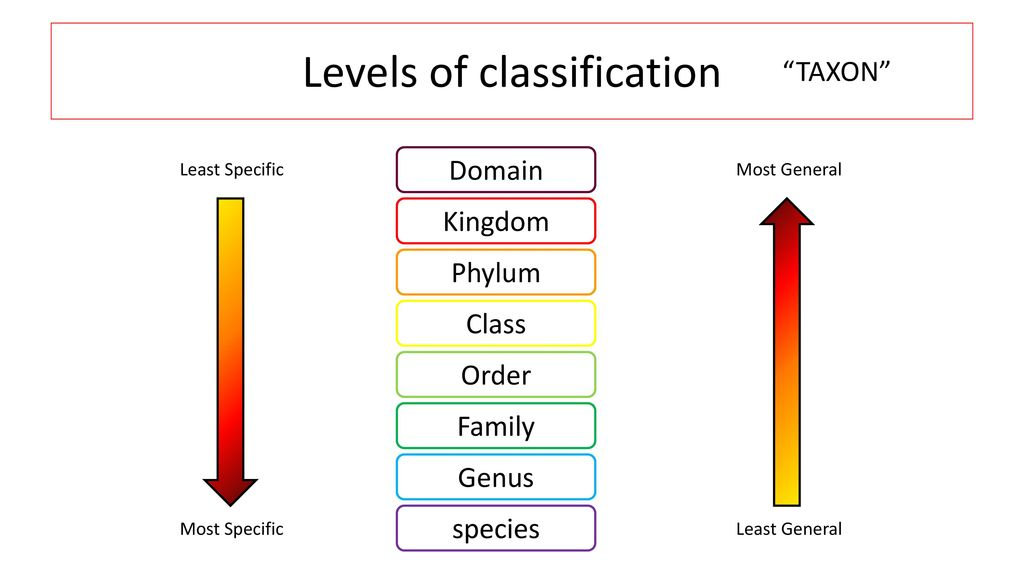

## **Datasource**

This project will use the following datasources:

   * 2 csv files (created using ad-hoc queries)
      * **mushrooms**
           This csv file gives all the detailed information for each image collected from the Mushroom Observer website, including all levels of classifiction
      * **genus**
           This csv file gives all the detailed information for each image collected from the Mushroom Observer website, and considering only the level of classification "genus"

    This data will be use during the modelling phase to improve the model performance and results

   * 1 folder containing all the pictures downloaded from the Mushroom Observer website that we were able to download from the Mushroom Observer website as of March 2021



### **MUSHROOMS dataframe**

All the data we have been able to collect about mushrooms have been collected into the **mushrooms** dataframe.  

The caracteristics of this dataframe are the following:
   * one row of this dataframe correspond to a specific mushroom image 
   * **image_id** is the feature that contains the image identifiant
   * for each image this dataframe associates the maximum information about the taxonomy associated to the mushroom on the image



### **GENUS dataframe**

The **genus** dataframe is a subset of the **mushrooms** dataframe that will have one row per mushroom image and will associate only genus information (and parent levels) about mushroom taxonomy.

Our project will make great use of this dataframe, while mushrooms dataframe is kept in this project only if we decide to consider another classification level than genus.

### **Images**

Images are physically stored in Google Drive (inside: Mushroom_project / datasource / mushroomObserver / images)

Images are all identified inside the dataframes by their IDs: image_id.
Images are stored in "images" directory inside Google drive so that:
   : the file name has the following naming: [image_id].jpg  
So that it is very easy to retrieve the image file if you know the ID of the image.

## **Loading data**

In [5]:
# Loading Data
#
# MUSHROOMS
mushrooms = pd.read_csv( \
      filepath_or_buffer = SRC_DIR + '/' + MUSHROOMS_CSV_FILENAME
   ,  sep = ','
   ,  header = 0
)

# GENUS
genus = pd.read_csv( \
      filepath_or_buffer = SRC_DIR + '/' + GENUS_CSV_FILENAME
   ,  sep = ','
   ,  header = 0
)

## **Data Exploration**

### **MUSHROOMS** Dataframe

#### Shape

In [ ]:
# Dataframe shape : [mushrooms]
print('')
print('+~~~~~~~~~~~~~~~~~')
print('| Dataframe shape: [mushrooms]: ')
print('+~~~~~~~~~~~~~~~~~')
print(mushrooms.shape)


+~~~~~~~~~~~~~~~~~
| Dataframe shape: [mushrooms]: 
+~~~~~~~~~~~~~~~~~
(3536224, 39)


#### Features

Find below the description of the main features that will be used inside this dataframe:

<table>
   <theader>
      <tr><th>Feature</th><th>Description</th></tr>
   </theader>
   <tbody>
      <tr><td>obs_id</span></td><td>observation id</td></tr>
      <tr><td>obs_date</td><td>observation date (when seen)</td></tr>
      <tr><td>taxon_id</td><td>taxon id</td></tr>
      <tr><td>taxon_name</td><td>taxon name</td></tr>
      <tr><td>taxon_rank</td><td>taxon level<br>(allowed values: 'species', 'genus', 'subspecies', 'group', 'variety', 'form',
       'subgenus', 'section', 'subsection', 'stirps')</td></tr>
      <tr><td>domain</td><td>taxon parent: domain</td></tr>
      <tr><td>kingdom</td><td>taxon parent: kingdom</td></tr>
      <tr><td>phylum</td><td>taxon parent: phylum</td></tr>
      <tr><td>class</td><td>taxon parent: class</td></tr>
      <tr><td>order</td><td>taxon parent: order</td></tr>
      <tr><td>family</td><td>taxon parent: family</td></tr>
      <tr><td>image_id</td><td>image id</td></tr>
      <tr><td>image_date</td><td>image date (when photo was taken)</td></tr>
      <tr><td>image_url</td><td>image url (from mushroom observer web site)</td></tr>
      <tr><td>image_type</td><td>image type (this dataframe contains only jpg images)</td></tr>
      <tr><td>image_format</td><td>image format (this dataframe contains only images with a medium size (640 pixels in width or height)</td></tr>
   </tbody>
</table>

In [ ]:
# Dataframe features: [mushrooms] 
print('')
print('+~~~~~~~~~~~~~~~~~~~~')
print('| Dataframe features: [mushrooms]: ')
print('+~~~~~~~~~~~~~~~~~~~~')
print(mushrooms.info())


+~~~~~~~~~~~~~~~~~~~~
| Dataframe features: [mushrooms]: 
+~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536224 entries, 0 to 3536223
Data columns (total 39 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   obs_id                  int64  
 1   obs_date                object 
 2   is_collection_location  bool   
 3   confidence              float64
 4   obs_views               int64  
 5   consensus_id            int64  
 6   consensus_name          object 
 7   consensus_rank          object 
 8   consensus_synonym_id    int64  
 9   location_id             int64  
 10  location_name           object 
 11  primary_image_id        int64  
 12  primary_image_date      object 
 13  primary_image_license   object 
 14  primary_image_quality   float64
 15  taxon_id                int64  
 16  taxon_name              object 
 17  taxon_rank              object 
 18  deprecated              bool   
 19  misspelled              

#### First rows

In [ ]:
# First rows : [mushrooms]
print('')
print('+~~~~~~~~~~~~~~~~~~~~~~')
print('| Dataframe first rows: [mushrooms]: ')
print('+~~~~~~~~~~~~~~~~~~~~~~')
mushrooms.head(5)


+~~~~~~~~~~~~~~~~~~~~~~
| Dataframe first rows: [mushrooms]: 
+~~~~~~~~~~~~~~~~~~~~~~


,obs_id,obs_date,is_collection_location,confidence,obs_views,consensus_id,consensus_name,consensus_rank,consensus_synonym_id,location_id,location_name,primary_image_id,primary_image_date,primary_image_license,primary_image_quality,taxon_id,taxon_name,taxon_rank,deprecated,misspelled,domain,kingdom,phylum,class,order,family,image_id,image_date,image_license,image_quality,image_notes,image_views,image_ok_for_export,image_content_type,image_width,image_height,image_url,image_type,image_format
0,9,2003-01-03,True,2.49991,158,7,Xerocomus subtomentosus,species,645,69,"Crescenta Valley Community Regional Park, La C...",9,2003-01-03,Creative Commons Wikipedia Compatible v3.0,NaN,7,Xerocomus subtomentosus,species,False,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2003-01-03,Creative Commons Wikipedia Compatible v3.0,4.0,<p>Loaded from Xerocomus/subtomentosus/2003-01...,106.0,True,image/jpeg,1600.0,1200.0,https://mushroomobserver.org/images/thumb/10.jpg,jpg,thumb
1,9,2003-01-03,True,2.49991,158,7,Xerocomus subtomentosus,species,645,69,"Crescenta Valley Community Regional Park, La C...",9,2003-01-03,Creative Commons Wikipedia Compatible v3.0,NaN,7,Xerocomus subtomentosus,species,False,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2003-01-03,Creative Commons Wikipedia Compatible v3.0,4.0,<p>Loaded from Xerocomus/subtomentosus/2003-01...,106.0,True,image/jpeg,1600.0,1200.0,https://mushroomobserver.org/images/320/10.jpg,jpg,320
2,9,2003-01-03,True,2.49991,158,7,Xerocomus subtomentosus,species,645,69,"Crescenta Valley Community Regional Park, La C...",9,2003-01-03,Creative Commons Wikipedia Compatible v3.0,NaN,7,Xerocomus subtomentosus,species,False,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2003-01-03,Creative Commons Wikipedia Compatible v3.0,4.0,<p>Loaded from Xerocomus/subtomentosus/2003-01...,106.0,True,image/jpeg,1600.0,1200.0,https://mushroomobserver.org/images/640/10.jpg,jpg,640
3,9,2003-01-03,True,2.49991,158,7,Xerocomus subtomentosus,species,645,69,"Crescenta Valley Community Regional Park, La C...",9,2003-01-03,Creative Commons Wikipedia Compatible v3.0,NaN,7,Xerocomus subtomentosus,species,False,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2003-01-03,Creative Commons Wikipedia Compatible v3.0,4.0,<p>Loaded from Xerocomus/subtomentosus/2003-01...,106.0,True,image/jpeg,1600.0,1200.0,https://mushroomobserver.org/images/960/10.jpg,jpg,960
4,9,2003-01-03,True,2.49991,158,7,Xerocomus subtomentosus,species,645,69,"Crescenta Valley Community Regional Park, La C...",9,2003-01-03,Creative Commons Wikipedia Compatible v3.0,NaN,7,Xerocomus subtomentosus,species,False,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2003-01-03,Creative Commons Wikipedia Compatible v3.0,4.0,<p>Loaded from Xerocomus/subtomentosus/2003-01...,106.0,True,image/jpeg,1600.0,1200.0,https://mushroomobserver.org/images/1280/10.jpg,jpg,1280


#### Missing Data

Is there any missing data inside mushrooms dataframe ?

In [ ]:
# Missing data : [mushrooms]
print('')
print('+~~~~~~~~~~~~~~')
print('| Missing data: [mushrooms]: ')
print('+~~~~~~~~~~~~~~')
print(mushrooms.isna().sum())


+~~~~~~~~~~~~~~
| Missing data: [mushrooms]: 
+~~~~~~~~~~~~~~
obs_id                          0
obs_date                        0
is_collection_location          0
confidence                  13220
obs_views                       0
consensus_id                    0
consensus_name                  0
consensus_rank                  0
consensus_synonym_id            0
location_id                     0
location_name                   0
primary_image_id                0
primary_image_date            803
primary_image_license         803
primary_image_quality     2667331
taxon_id                        0
taxon_name                      0
taxon_rank                      0
deprecated                      0
misspelled                      0
domain                     909133
kingdom                    841107
phylum                     843045
class                      873348
order                      868444
family                     906820
image_id                        0
image_date         

#### Taxonomy exploration

This section shows the proportion of unique name per taxonomy level (family, genus, ...) that we collected inside our dataframe **mushrooms** .

Our model will have to identify the name of the taxonomy level according to a given mushroom image.
The data presented in this section will help us to identify the taxonomy level that we will consider (the one that our model will have to recognize).
The more names a taxonomy level will have the more our model will have to learn.

So, the graph presented below will show the number of distinct names per taxonomy levels.


+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
| Taxonomy distribution inside dataframe: [mushrooms]: 
+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Text(0.5, 0, 'number of distinct names')

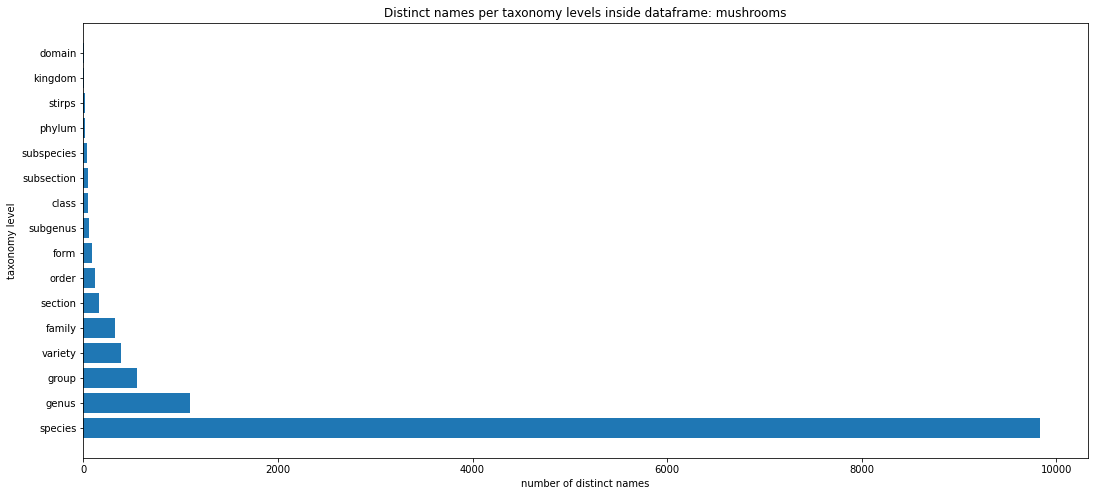

In [ ]:
# Display taxonomy distribution inside dataframe: [mushrooms]
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
taxons = [
     'species'
   , 'genus'
   , 'group'
   , 'variety'
   , 'family'
   , 'section'
   , 'order'
   , 'form'
   , 'subgenus'
   , 'class'
   , 'subsection'
   , 'subspecies'
   , 'phylum'
   , 'stirps'
   , 'kingdom'
   , 'domain'
]

data = [
      mushrooms[ mushrooms['taxon_rank'] == 'species' ]['taxon_name'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'genus' ]['taxon_name'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'group' ]['taxon_name'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'variety' ]['taxon_name'].nunique()
   ,  mushrooms['family'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'section' ]['taxon_name'].nunique()
   ,  mushrooms['order'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'form' ]['taxon_name'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'subgenus' ]['taxon_name'].nunique()
   ,  mushrooms['class'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'subsection' ]['taxon_name'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'subspecies' ]['taxon_name'].nunique()
   ,  mushrooms['phylum'].nunique()
   ,  mushrooms[ mushrooms['taxon_rank'] == 'stirps' ]['taxon_name'].nunique()
   ,  mushrooms['kingdom'].nunique()
   ,  mushrooms['domain'].nunique()
]

print('')
print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('| Taxonomy distribution inside dataframe: [mushrooms]: ')
print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
ax.barh(taxons, data)
ax.set_title('Distinct names per taxonomy levels inside dataframe: mushrooms')
ax.set_ylabel('taxonomy level')
ax.set_xlabel('number of distinct names')

### **GENUS** Dataframe

#### Shape

In [ ]:
# Dataframe shape : [genus]
print('')
print('+~~~~~~~~~~~~~~~~~')
print('| Dataframe shape: [genus]: ')
print('+~~~~~~~~~~~~~~~~~')
print(genus.shape)


+~~~~~~~~~~~~~~~~~
| Dataframe shape: [genus]: 
+~~~~~~~~~~~~~~~~~
(150306, 36)


#### Features

Find below the description of the main features that will be used inside this dataframe:

<table>
   <theader>
      <tr><th>Feature</th><th>Description</th></tr>
   </theader>
   <tbody>
      <tr><td>obs_id</span></td><td>observation id</td></tr>
      <tr><td>obs_date</td><td>observation date (when seen)</td></tr>
      <tr><td>taxon_id</td><td>taxon id</td></tr>
      <tr><td>taxon_name</td><td>taxon name</td></tr>
      <tr><td>taxon_rank</td><td>taxon level<br>(the "genus" "dataframe only has 'genus' as value for this feature)</td></tr>
      <tr><td>domain</td><td>taxon parent: domain</td></tr>
      <tr><td>kingdom</td><td>taxon parent: kingdom</td></tr>
      <tr><td>phylum</td><td>taxon parent: phylum</td></tr>
      <tr><td>class</td><td>taxon parent: class</td></tr>
      <tr><td>order</td><td>taxon parent: order</td></tr>
      <tr><td>family</td><td>taxon parent: family</td></tr>
      <tr><td>image_id</td><td>image id</td></tr>
      <tr><td>image_date</td><td>image date (when photo was taken)</td></tr>
      <tr><td>image_url</td><td>image url (from mushroom observer web site)</td></tr>
      <tr><td>image_type</td><td>image type (this dataframe contains only jpg images)</td></tr>
      <tr><td>image_format</td><td>image format (this dataframe contains only images with a medium size (640 pixels in width or height)</td></tr>
   </tbody>
</table>

In [ ]:
# Dataframe features: [genus] 
print('')
print('+~~~~~~~~~~~~~~~~~~~~')
print('| Dataframe features: [genus]: ')
print('+~~~~~~~~~~~~~~~~~~~~')
print(genus.info())


+~~~~~~~~~~~~~~~~~~~~
| Dataframe features: [genus]: 
+~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150306 entries, 0 to 150305
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   obs_id                  150306 non-null  int64  
 1   obs_date                150306 non-null  object 
 2   is_collection_location  150306 non-null  bool   
 3   confidence              150001 non-null  float64
 4   obs_views               150306 non-null  int64  
 5   consensus_id            150306 non-null  int64  
 6   consensus_name          150306 non-null  object 
 7   consensus_rank          150306 non-null  object 
 8   consensus_synonym_id    150306 non-null  int64  
 9   location_id             150306 non-null  int64  
 10  location_name           150306 non-null  object 
 11  primary_image_id        150306 non-null  int64  
 12  primary_image_date      150281 non-null  object 
 1

#### First rows

In [ ]:
# First rows : [genus]
print('')
print('+~~~~~~~~~~~~~~~~~~~~~~')
print('| Dataframe first rows: [genus]: ')
print('+~~~~~~~~~~~~~~~~~~~~~~')
genus.head(5)


+~~~~~~~~~~~~~~~~~~~~~~
| Dataframe first rows: [genus]: 
+~~~~~~~~~~~~~~~~~~~~~~


,obs_id,obs_date,is_collection_location,confidence,obs_views,consensus_id,consensus_name,consensus_rank,consensus_synonym_id,location_id,location_name,primary_image_id,primary_image_date,primary_image_license,primary_image_quality,taxon_id,taxon_name,taxon_rank,deprecated,misspelled,domain,kingdom,phylum,class,order,family,image_id,image_date,image_license,image_quality,image_notes,image_views,image_ok_for_export,image_url,image_type,image_format
0,18,2005-01-09,False,1.802040,168,554,Agrocybe,genus,-9223372036854775808,58,"Santa Cruz, Santa Cruz Co., California, USA",21,2005-01-09,Creative Commons Wikipedia Compatible v3.0,NaN,554,Agrocybe,genus,False,False,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,22.0,2005-01-09,Creative Commons Wikipedia Compatible v3.0,NaN,<p>Loaded from Unknown/Basidiomycetes/2005-01-...,31.0,True,https://mushroomobserver.org/images/640/22.jpg,jpg,640
1,18,2005-01-09,False,1.802040,168,554,Agrocybe,genus,-9223372036854775808,58,"Santa Cruz, Santa Cruz Co., California, USA",21,2005-01-09,Creative Commons Wikipedia Compatible v3.0,NaN,554,Agrocybe,genus,False,False,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,23.0,2005-01-09,Creative Commons Wikipedia Compatible v3.0,NaN,<p>Loaded from Unknown/Basidiomycetes/2005-01-...,44.0,True,https://mushroomobserver.org/images/640/23.jpg,jpg,640
2,18,2005-01-09,False,1.802040,168,554,Agrocybe,genus,-9223372036854775808,58,"Santa Cruz, Santa Cruz Co., California, USA",21,2005-01-09,Creative Commons Wikipedia Compatible v3.0,NaN,554,Agrocybe,genus,False,False,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,24.0,2005-01-09,Creative Commons Wikipedia Compatible v3.0,NaN,<p>Size can be inferred from the Watex wax bag...,39.0,True,https://mushroomobserver.org/images/640/24.jpg,jpg,640
3,47,2002-01-05,True,0.852698,136,911,Tricholoma,genus,8911,38,"Chumash Interpretive Center, Thousand Oaks, Ve...",56,2002-01-05,Creative Commons Wikipedia Compatible v3.0,NaN,911,Tricholoma,genus,False,False,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Tricholomataceae,57.0,2002-01-05,Creative Commons Wikipedia Compatible v3.0,NaN,<p>Loaded from Tricholoma/argyraceum/2002-01-0...,47.0,True,https://mushroomobserver.org/images/640/57.jpg,jpg,640
4,94,2004-11-22,True,NaN,45,22603,Russula,genus,7124,39,"Wilder Ridge, Humboldt Co., California, USA",109,2004-11-22,Creative Commons Wikipedia Compatible v3.0,NaN,22603,Russula,genus,False,False,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Russulales,Russulaceae,108.0,2004-11-22,Creative Commons Wikipedia Compatible v3.0,NaN,<p>Loaded from Russula/species/2004-11-22-2.jp...,28.0,True,https://mushroomobserver.org/images/640/108.jpg,jpg,640


#### Missing Data

Is there any missing data inside genus dataframe ?

In [ ]:
# Missing data : [genus]
print('')
print('+~~~~~~~~~~~~~~')
print('| Missing data: [genus]: ')
print('+~~~~~~~~~~~~~~')
print(genus.isna().sum())


+~~~~~~~~~~~~~~
| Missing data: [genus]: 
+~~~~~~~~~~~~~~
obs_id                         0
obs_date                       0
is_collection_location         0
confidence                   305
obs_views                      0
consensus_id                   0
consensus_name                 0
consensus_rank                 0
consensus_synonym_id           0
location_id                    0
location_name                  0
primary_image_id               0
primary_image_date            25
primary_image_license         25
primary_image_quality     125149
taxon_id                       0
taxon_name                     0
taxon_rank                     0
deprecated                     0
misspelled                     0
domain                         0
kingdom                        0
phylum                         0
class                          0
order                          0
family                         0
image_id                       0
image_date                     0
image_license    

Features that have missing data are features that won't be used for the next steps of the project: so we don't have to be worried about that. 

#### Taxonomy exploration

##### [*] - Taxon levels

Find below the taxonomy information available inside **genus** dataframe.  
"genus" dataframe only has rows with: taxon_rank == 'genus' but has a few features that will permit to identify the parent taxons associated to each genus.
So the graph below will represent the different distinct elements per taxon level that are available in the dataframe.


+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
| Taxonomy distribution inside dataframe: [genus]: 
+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Text(0.5, 0, 'number of distinct names')

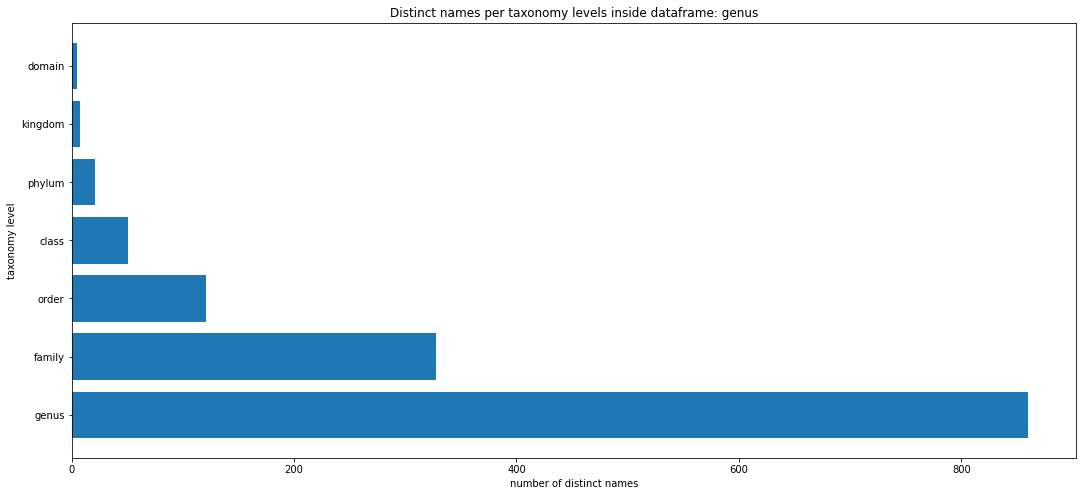

In [ ]:
# Display taxonomy distribution inside dataframe: [genus]
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
taxons = [
     'genus'
   , 'family'
   , 'order'
   , 'class'
   , 'phylum'
   , 'kingdom'
   , 'domain'
]

data = [
      genus[ genus['taxon_rank'] == 'genus' ]['taxon_name'].nunique()
   ,  mushrooms['family'].nunique()
   ,  mushrooms['order'].nunique()
   ,  mushrooms['class'].nunique()
   ,  mushrooms['phylum'].nunique()
   ,  mushrooms['kingdom'].nunique()
   ,  mushrooms['domain'].nunique()
]

print('')
print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('| Taxonomy distribution inside dataframe: [genus]: ')
print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
ax.barh(taxons, data)
ax.set_title('Distinct names per taxonomy levels inside dataframe: genus')
ax.set_ylabel('taxonomy level')
ax.set_xlabel('number of distinct names')

##### [*] - Distinct Genus

In [ ]:
# Distinct genus by ID then by NAME
#
print('')
print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('| Distinct genus inside dataframe: [genus]: ')
print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
# Number of distinct genus
# By id
print('Distinct genus by ID:')
print(genus['taxon_id'].nunique())
# By name
print('\nDistinct genus by NAME:')
print(genus['taxon_name'].nunique())


+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
| Distinct genus inside dataframe: [genus]: 
+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Distinct genus by ID:
862

Distinct genus by NAME:
860


> Our dataframe is made of 860 genus in total. As this figure is obvisously too high, we will explore ways to reduce it below.

###### Here we check if number of taxon_id is the same as taxon_name..  

In [ ]:
# We notice that we have 2 more IDs comapring to the names

# Let's try to identify we can have 1 genus name that correspond to more than 1 id
r = genus.groupby(by=['taxon_name']).agg('nunique')['taxon_id']
print('\nGenus for which we have more than 1 ID:')
print(r[ r > 1])

# We found two genus names that have more than 1 ID
# Let's see that...
print('\nAnalysing rows corresponding to genus name: Myrothecium')
r = genus[ genus['taxon_name'] == 'Myrothecium' ]
print(r.nunique()[['taxon_id', 'taxon_rank', 'domain', 'kingdom', 'phylum', 'class', 'order', 'family']])
# => Only the taxon_id has more than 1 distinct value
# Taxon_id repartition for this genus name 
print('\nRows proportion corresponding to genus name: Myrothecium')
print(r.groupby(by=['taxon_id']).agg(['size', 'count', 'nunique'])['obs_id'])
# => Proposition
#    As we have less rows with taxon_id = 63926, let's update taxon_id: 63926 -> 63938
# Before checking that we don't have any other row in "genus" dataframe that has taxon_id = 63926
print('\nHow many rows for taxon_id = 63926:')
print(genus[ genus['taxon_id'] == 63926 ].shape[0])
# 10: the 1O rows identified: we can proceed with the update !

print('\nAnalysing rows corresponding to genus name: Xerula')
r = genus[ genus['taxon_name'] == 'Xerula' ]
print(r.nunique()[['taxon_id', 'taxon_rank', 'domain', 'kingdom', 'phylum', 'class', 'order', 'family']])
# => Only the taxon_id has more than 1 distinct value
# Taxon_id repartition for this genus name 
print('\nRows proportion corresponding to genus name: Xerula')
print(r.groupby(by=['taxon_id']).agg(['size', 'count', 'nunique'])['obs_id'])
# => Proposition
#    As we have less rows with taxon_id = 58816, let's update taxon_id: 58816 -> 5035
# Before checking that we don't have any other row in "genus" dataframe that has taxon_id = 63926
print('How many rows for taxon_id = 58816:')
print(genus[ genus['taxon_id'] == 58816 ].shape[0])
# 5: the 5 rows identified: we can proceed with the update !


Genus for which we have more than 1 ID:
taxon_name
Myrothecium    2
Xerula         2
Name: taxon_id, dtype: int64

Analysing rows corresponding to genus name: Myrothecium
taxon_id      2
taxon_rank    1
domain        1
kingdom       1
phylum        1
class         1
order         1
family        1
dtype: int64

Rows proportion corresponding to genus name: Myrothecium
          size  count  nunique
taxon_id                      
63926       10     10        1
63938       41     41        6

How many rows for taxon_id = 63926:
10

Analysing rows corresponding to genus name: Xerula
taxon_id      2
taxon_rank    1
domain        1
kingdom       1
phylum        1
class         1
order         1
family        1
dtype: int64

Rows proportion corresponding to genus name: Xerula
          size  count  nunique
taxon_id                      
5035       150    150       62
58816        5      5        3
How many rows for taxon_id = 58816:
5


##### [*] - Distinct images per Genus

In [6]:
# Computing distinct images cnt per genus
#
images_per_genus = genus.groupby(by=['taxon_name']).agg('nunique')['image_id']
images_per_genus.sort_values(axis='index', ascending=True, inplace=False)

taxon_name
Monilinia             1
Marchandiomyces       1
Heppia                1
Crocicreas            1
Crocodia              1
                   ... 
Agaricus           4771
Mycena             4992
Psathyrella        5733
Cortinarius        6775
Russula            7490
Name: image_id, Length: 860, dtype: int64

Text(0.5, 0, 'Number of images')

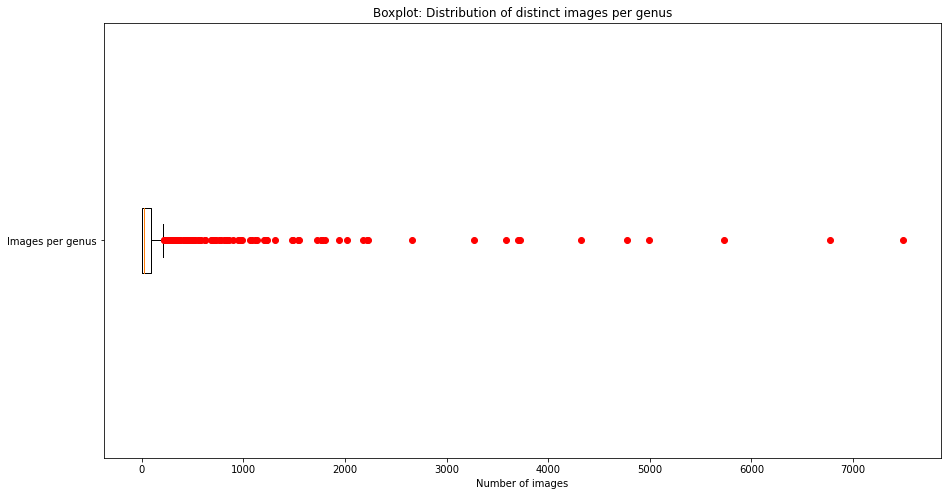

In [7]:
# Graphing the result
#
fig = plt.figure(figsize=(15,8))
plt.boxplot(images_per_genus, sym='ro', vert=False, labels=['Images per genus']);
plt.title('Boxplot: Distribution of distinct images per genus')
plt.xlabel('Number of images')

We can see that there is a strong disparity in the distribution of number of images by "genus" !

To avoid biased results that can be due to genus with more pictures than others, we decide to filter genus based on the number of pictures by genus

So for all genus for which we won't have enough images given a particular threshold, they all be ignored.

##### [*] - Eligible genus


This part will present a graph that will help us to estimate the number of genus that will have enough images so that the threshold IMAGES_PER_TAXON will be guaranteed.


Text(0, 0.5, 'Nombre de genres de champignons (disposant du nombre dimages requis)')

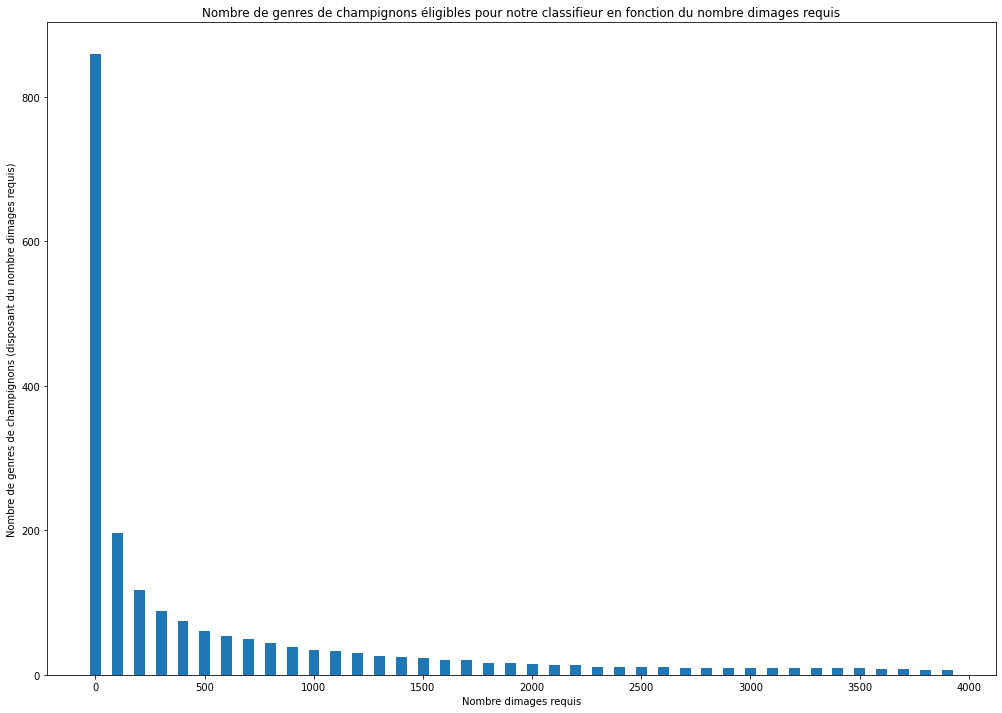

In [ ]:
# Visualize eligible genus per value of parameter: THRESHOLD_IMAGES_PER_TAXON
#
img_per_genus = genus.groupby(by=['taxon_name']).agg('nunique')['image_id']
grid_params = np.arange(1, 4000 + 1, 100)
genus_cnt = []
for threshold in grid_params:
   cnt = img_per_genus[ img_per_genus >= threshold ].shape[0]
   genus_cnt.append(cnt)

plt.figure(figsize=(17,12))
plt.bar(grid_params, genus_cnt, width=50)
plt.title('Nombre de genres de champignons éligibles pour notre classifieur en fonction du nombre d''images requis')
plt.xlabel('Nombre d''images requis')
plt.ylabel('Nombre de genres de champignons (disposant du nombre d''images requis)')

With our "genus" dataset, we can easily see, using the above graph, the number of genus that will have enough images according to the value that it will be decided to set the parameter: THREASHOLD_IMAGES_PER_TAXON.
We will know that our model won't be able to learn more than that number of genus because all genus that won't have enough images won't be learned/considered by our model.

For example:
If we set the parameter THREASHOLD_IMAGES_PER_TAXON to 1000,  
the above graph tells us that ~ 30 to 35 genus will have enough images in our dataset. So our model won't be able to learn more that 30 to 35 genus with this setting.

In [8]:
#Finally create the dataframe that extracts genus containing exactly THREASHOLD_IMAGES_PER_TAXON pictures
#We may change the threshold during the modelling phase to see the impacts
THREASHOLD_IMAGES_PER_TAXON=1000
genus_sel=images_per_genus[images_per_genus>= THREASHOLD_IMAGES_PER_TAXON].index
df_genus=pd.DataFrame(columns=genus.columns)
for genre in genus_sel:
  df_genus=pd.concat([df_genus,genus[ genus['taxon_name']==genre].head(THREASHOLD_IMAGES_PER_TAXON)], ignore_index=True)
df_genus.shape


(35000, 36)

In [9]:
#Save the dataframe to a CSV file for future use in step 3
dest_filePath = SRC_DIR + '/' + "df_genus.csv"
df_genus.to_csv( \
      path_or_buf = dest_filePath
   ,  sep = ','
   ,  header = True
   ,  index = False
   ,  mode = 'w'
   ,  encoding = 'utf-8'
)

## Data visualisation

We illustrate the visualisation of our dataframe by randomly selecting  9 mushrooms for a particular genus (randomly selected)

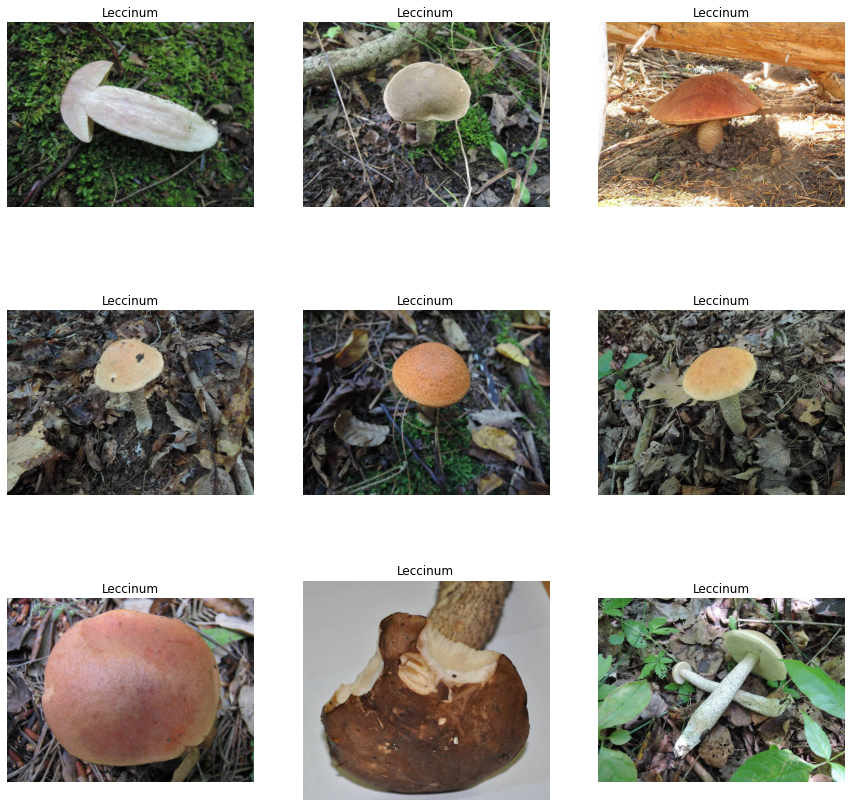

In [11]:
liste_genre = df_genus.groupby(by=['taxon_name']).agg('nunique')['image_id']
g=liste_genre.index[random.randint(0,liste_genre.index.shape[0])]
df_genus_temp=df_genus[df_genus["taxon_name"]==g].reset_index()

plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  k=random.randint(0,df_genus_temp.shape[0])
  img=io.imread(df_genus_temp.image_url[k])
  plt.imshow(img)
  plt.title(df_genus_temp.taxon_name[k])
  plt.axis("off")

And finally for our pleasure we show 9 different genus randomly selecting 9 mushrooms



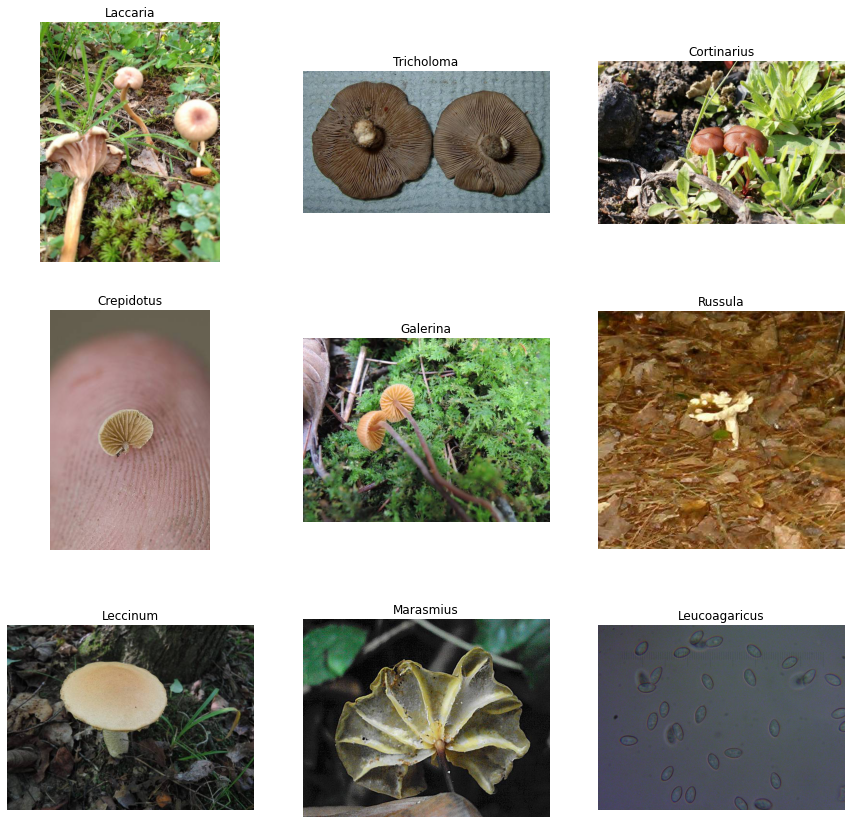

In [12]:

plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  k=random.randint(0,df_genus.shape[0])
  img=io.imread(df_genus.image_url[k])
  plt.imshow(img)
  plt.title(df_genus.taxon_name[k])
  plt.axis("off")